# Install

# Import Libraries
If you want to rerun this code or make changes, you will need to mount your drive and copy the file paths of files you want as they appear in your folder.


Mount drive and import useful libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# Utilities

In [ ]:
# missing values per column function
def show_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_percentages = 100 * missing_counts / len(df)
    missing_table = pd.concat([missing_counts, missing_percentages], axis=1)
    missing_table = missing_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    missing_table = missing_table[missing_table.iloc[:, 0] != 0].sort_values('% of Total Values', ascending=False)
    return missing_table

In [ ]:
def find_no_missing_cols(df):
    no_missing_cols = df.columns[df.isnull().sum() == 0]
    return no_missing_cols

In [ ]:
def get_string_columns(df):
    string_cols = []
    for col in df.columns:
        if df[col].apply(lambda x: any([i.isalpha() for i in str(x)])).any():
            string_cols.append(col)
    return string_cols

In [ ]:
def convert_sex_to_binary(df, column_name):
    # create a new column with binary values
    df['binary_sex'] = df[column_name].apply(lambda x: 1 if x == 'M' else 0)
    return df

def convert_binary_to_sex(df, column_name):
    # create a new column with 'M' or 'F' values
    df['sex_from_binary'] = df[column_name].apply(lambda x: 'M' if x == 1 else 'F')
    return df

In [ ]:
# get rid of nan and all that undefined behavior
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=False)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(float)

In [ ]:
def select_all_except_first_row(df):
    return df.iloc[1:]

In [ ]:
# missing values per row
def count_nan_rows(df):
    total_rows = len(df)
    nan_rows = df.isnull().any(axis=1).sum()
    nan_percent = 100 * (nan_rows / total_rows)
    print("Number of rows with NaN values: {}".format(nan_rows))
    print("Percentage of rows with NaN values: {:.2f}%".format(nan_percent))
    return nan_rows, nan_percent

In [ ]:
def show_missing_rows(df):
    missing_counts = df.isnull().sum(axis=1)
    missing_percentages = 100 * missing_counts / len(df.columns)
    missing_table = pd.concat([missing_counts, missing_percentages], axis=1)
    missing_table = missing_table.rename(columns={0: 'Missing Values', 1: '% of Total Columns'})
    missing_table = missing_table[missing_table.iloc[:, 0] != 0].sort_values('% of Total Columns', ascending=False)
    return missing_table

In [ ]:
def count_value(df, value):
    count = (df == value).sum()
    count_table = pd.DataFrame({'Column': count.index, 'Count': count.values}).sort_values('Count', ascending=False)
    return count_table

In [ ]:
def remove_rows_with_value(df, value):
    new_df = df[~(df == value).any(axis=1)]
    return new_df

In [ ]:
def get_value_counts(df):
  # get unique values and counts for each column
  for column in df.columns:
      counts = df[column].value_counts()
      print(f"Counts for column '{column}':\n{counts}\n")

In [ ]:
def compute_stats_ed(df, col1, col2, col3):
    df['Avg Ed'] = df.apply(lambda x: (x[col1] + x[col2])/2 if x[col3] == 1 else x[col1], axis=1)
    df['Max Ed'] = df.apply(lambda x: max(x[col1], x[col2]) if x[col3] == 1 else x[col1], axis=1)
    df['Sum Ed'] = df.apply(lambda x: x[col1] if x[col3] != 1 else x[col1] + x[col2], axis=1)
    return df

In [ ]:
def check_number_in_columns(df, columns, number):
    for col in columns:
        if number in df[col].values:
            return True
    return False

In [ ]:
def sum_columns(df, column_list, new_column_name):
    df[new_column_name] = df[column_list].sum(axis=1)
    return df

In [ ]:
def distplots(df, bins=100):
  for i in range(1,len(df.columns)) :
      col_name = df.columns[i]  # get the column name to identify the graph
      x=df[col_name]
      plt.xlabel(col_name)         # The column name will be the x-label ( just to identify )
      k=plt.hist(x,bins)       # Change the right number of bins to get it more/less granular
      plt.show()

In [ ]:
def select_columns(df, condition_col, condition_func, cols_to_select):
    """
    Selects a list of columns from a Pandas dataframe based on whether a condition is satisfied in one of the columns.
    """
    # Filter the dataframe to only include rows where the condition is satisfied
    filtered_df = df[df[condition_col].apply(condition_func)]

    # Select the desired columns from the filtered dataframe
    selected_df = filtered_df[cols_to_select]

    return selected_df

In [ ]:
def check_value(df, value_cols, no_value_cols, value, new_col_name):
    # Check if value is present only in the specified value_cols
    mask_value = (df[value_cols] == value).all(axis=1)

    # Check if value is not present in any of the specified no_value_cols
    mask_no_value = (df[no_value_cols] != value).all(axis=1)

    # Create a new column with a 1 if both conditions are met, 0 otherwise
    df[new_col_name] = 0
    df.loc[mask_value & mask_no_value, new_col_name] = 1

    return df

In [ ]:
def convert_str_to_num(df):
    """
    Converts string representations of numbers in a dataframe to float data type.
    """
    for col in df.columns:
        if df[col].dtypes == object:
            try:
                df[col] = pd.to_numeric(df[col])
            except ValueError:
                pass  # if the column can't be converted, ignore it
    return df

In [ ]:
def convert_columns_to_float(df):
    """
    Converts all columns of a Pandas dataframe to be of type float, except for ones that contain alphabetic characters.
    """
    # Get a boolean mask indicating which columns contain alphabetic characters
    non_numeric_cols = df.select_dtypes(include=['object']).apply(lambda col: pd.to_numeric(col, errors='coerce').isna()).any()

    # Select only the numeric columns
    numeric_cols = df.select_dtypes(include=['float', 'int'])

    # Convert the numeric columns to float
    numeric_cols = numeric_cols.apply(pd.to_numeric, errors='coerce').astype('float')

    # Merge the numeric and non-numeric columns
    converted_df = pd.concat([numeric_cols, df.loc[:, non_numeric_cols]], axis=1)

    return converted_df

In [ ]:
def column_description_dict(df):
    # Get the first row of the dataframe
    first_row = df.iloc[0]

    # Create a dictionary with column names as keys and first row values as descriptions
    column_descriptions = {col: first_row[col] for col in df.columns}

    return column_descriptions

In [ ]:
def my_recode(x):
    if x == 1:
        return 1
    else:
        return 0

# Aims

## Aim 1

In [ ]:
aim1_df = pd.read_csv('/content/drive/MyDrive/ABCD_WorkingProjects/4_data/0_raw data/Cleaned Dataframes/251/aim1_df.csv')

In [ ]:
aim1_df = aim1_df.drop('Unnamed: 0', axis=1)

In [ ]:
aim1_df

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,demo_brthdat_v2,phys_neglect_score,emo_neglect_score,sup_neglect_score,phys_neglect_score_binarized,emo_neglect_score_binarized,sup_neglect_score_binarized,Overall Neglect,asr_scr_totprob_r,Abuse y/n
0,NDAR_INV01NAYMZH,12.0,1,18.0,2.584425,0,mid income,College,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,14.0,0
1,NDAR_INV028WCTG6,3.0,0,14.0,0.122429,0,deep poverty,High school,Not working,Single,...,9.0,1.0,0,0,1,0,0,P,0.0,0
2,NDAR_INV005V6D2C,5.0,1,6.0,NaN,0,NaN,Less than high school,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,2.0,0
3,NDAR_INV00BD7VDC,4.0,1,20.0,8.130081,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,10.0,0
4,NDAR_INV02H7G2T6,4.0,1,19.0,6.097561,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11828,NDAR_INVZJFZNNPJ,4.0,0,16.0,1.727642,2,near poverty,Some college,Full-time,Single,...,10.0,0.0,0,0,0,0,0,None,2.0,0
11829,NDAR_INVZJJMNJ88,4.0,1,15.0,0.386179,1,deep poverty,Some college,Part-time,Partnered,...,10.0,1.0,0,0,1,0,0,P,24.0,0
11830,NDAR_INVZZPKBDAC,5.0,1,19.0,6.949270,0,high income,Advanced degree,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,6.0,0
11831,NDAR_INVZV4EUGNG,4.0,1,12.0,0.386179,2,deep poverty,Some high school,Full-time,Partnered,...,9.0,1.0,0,0,1,0,0,P,59.0,0


## Aim 2

In [ ]:
aim2_df = pd.read_csv('/content/drive/MyDrive/ABCD_WorkingProjects/4_data/0_raw data/Cleaned Dataframes/251/aim2_df.csv')
aim2_df = aim2_df.drop('Unnamed: 0', axis=1)

In [ ]:
int_ext_stb_df = pd.read_csv('/content/drive/MyDrive/ABCD_WorkingProjects/4_data/0_raw data/Cleaned Dataframes/251/int_ext_stb.csv')
int_ext_stb_df = int_ext_stb_df.drop('Unnamed: 0', axis=1)

In [ ]:
int_ext_stb_df

,index,Anhedonia score_binary,Low Self Esteem score_binary,Anxious score_binary,Self Conscious score_binary,Emotional reactivity score_binary,Oppositionality score_binary,Antisocial score_binary,Physical aggression score_binary,subjectkey,any_stb
0,1,0,0,0,0,0,0,0,0,NDAR_INV021403LF,0
1,2,0,0,0,0,0,0,0,0,NDAR_INV021N0FLH,0
2,3,0,0,0,1,0,0,0,0,NDAR_INV028WCTG6,0
3,4,0,0,0,1,0,0,0,0,NDAR_INV059VLAHF,0
4,5,0,0,0,1,0,0,0,0,NDAR_INV04YC4RXD,0
...,...,...,...,...,...,...,...,...,...,...,...
11870,11871,1,1,1,1,1,1,1,1,NDAR_INVYNVAMHNU,0
11871,11872,0,0,0,0,0,0,0,0,NDAR_INVYEHJWVEG,1
11872,11873,0,0,0,0,0,1,0,0,NDAR_INVYJAFABD8,0
11873,11874,0,0,0,0,0,0,0,0,NDAR_INVYN1N2HYA,0


In [ ]:
stb_df = int_ext_stb_df[['subjectkey', 'any_stb']]

In [ ]:
stb_df

,subjectkey,any_stb
0,NDAR_INV021403LF,0
1,NDAR_INV021N0FLH,0
2,NDAR_INV028WCTG6,0
3,NDAR_INV059VLAHF,0
4,NDAR_INV04YC4RXD,0
...,...,...
11870,NDAR_INVYNVAMHNU,0
11871,NDAR_INVYEHJWVEG,1
11872,NDAR_INVYJAFABD8,0
11873,NDAR_INVYN1N2HYA,0


In [ ]:
aim2_df.columns

Index(['subjectkey', 'phys_neglect_score', 'emo_neglect_score',
       'sup_neglect_score', 'phys_neglect_score_binarized',
       'emo_neglect_score_binarized', 'sup_neglect_score_binarized',
       'Overall Neglect', 'externalizing score', 'internalizing score',
       'externalizing score scaled', 'internalizing score scaled',
       'kbi_y_drop_in_grades', 'kbi_y_det_susp'],
      dtype='object')

In [ ]:
aim2_df = pd.merge(aim2_df, stb_df, on="subjectkey", how="inner")

In [ ]:
new_cbcl_df = pd.read_csv('/content/drive/MyDrive/ABCD_WorkingProjects/4_data/0_raw data/Cleaned Dataframes/251/new_cbcl.csv')

In [ ]:
aim2_df = pd.merge(aim2_df, new_cbcl_df, on="subjectkey", how="inner")

In [ ]:
aim2_df.columns

Index(['subjectkey', 'phys_neglect_score', 'emo_neglect_score',
       'sup_neglect_score', 'phys_neglect_score_binarized',
       'emo_neglect_score_binarized', 'sup_neglect_score_binarized',
       'Overall Neglect', 'externalizing score', 'internalizing score',
       'externalizing score scaled', 'internalizing score scaled',
       'kbi_y_drop_in_grades', 'kbi_y_det_susp', 'any_stb', 'totprob_cat',
       'internal_cat', 'external_cat', 'anxdep_cat', 'withdep_cat',
       'somatic_cat', 'social_cat', 'thought_cat', 'attention_cat',
       'rulebreak_cat', 'aggressive_cat', 'totprob_num', 'totprob_binary',
       'internal_num', 'internal_binary', 'external_num', 'external_binary',
       'anxdep_num', 'anxdep_binary', 'withdep_num', 'withdep_binary',
       'somatic_num', 'somatic_binary', 'social_num', 'social_binary',
       'thought_num', 'thought_binary', 'attention_num', 'attention_binary',
       'rulebreak_num', 'rulebreak_binary', 'aggressive_num',
       'aggressive_binar

In [ ]:
aim2_df = aim2_df[['subjectkey', 'phys_neglect_score', 'emo_neglect_score',
       'sup_neglect_score', 'phys_neglect_score_binarized',
       'emo_neglect_score_binarized', 'sup_neglect_score_binarized',
       'Overall Neglect', 'any_stb', 'totprob_cat',
       'internal_cat', 'external_cat', 'totprob_num', 'totprob_binary',
       'internal_num', 'internal_binary', 'external_num', 'external_binary']]

## Full aims for tables

In [ ]:
full_aims_df = pd.merge(aim1_df, aim2_df, on='subjectkey', how='inner')

In [ ]:
full_aims_df.columns

Index(['subjectkey', 'Household Size', 'Partner Status', 'Max Ed', 'INR',
       'Employment Status', 'INR Group', 'Highest Education Level',
       'Employment Category', 'Relationship Status', 'reshist_addr1_adi_perc',
       'reshist_addr1_coi_r_coi_nat', 'Race', 'Race grouping', 'sex',
       'demo_brthdat_v2', 'phys_neglect_score_x', 'emo_neglect_score_x',
       'sup_neglect_score_x', 'phys_neglect_score_binarized_x',
       'emo_neglect_score_binarized_x', 'sup_neglect_score_binarized_x',
       'Overall Neglect_x', 'asr_scr_totprob_r', 'Abuse y/n',
       'phys_neglect_score_y', 'emo_neglect_score_y', 'sup_neglect_score_y',
       'phys_neglect_score_binarized_y', 'emo_neglect_score_binarized_y',
       'sup_neglect_score_binarized_y', 'Overall Neglect_y',
       'kbi_y_drop_in_grades', 'kbi_y_det_susp', 'any_stb', 'totprob_cat',
       'internal_cat', 'external_cat', 'anxdep_cat', 'withdep_cat',
       'somatic_cat', 'social_cat', 'thought_cat', 'attention_cat',
       'rulebr

In [ ]:
table_df = pd.merge(aim1_df[['subjectkey', 'INR Group', 'INR', 'Highest Education Level', 'Household Size', 'Partner Status', 'Max Ed', 'INR', 'Employment Status', 'INR Group', 'Highest Education Level', 'Employment Category', 'Relationship Status', 'ADI', 'COI', 'Race', 'Race grouping', 'Sex', 'Age',
           'Adult Psychopathology', 'Abuse']], aim2_df, on='subjectkey', how='inner')

In [ ]:
table_df

,subjectkey,INR Group,INR,Highest Education Level,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,...,any_stb,totprob_cat,internal_cat,external_cat,totprob_num,totprob_binary,internal_num,internal_binary,external_num,external_binary
0,NDAR_INV01NAYMZH,mid income,2.584425,College,12.0,1,18.0,2.584425,0,mid income,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
1,NDAR_INV028WCTG6,deep poverty,0.122429,High school,3.0,0,14.0,0.122429,0,deep poverty,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
2,NDAR_INV005V6D2C,NaN,NaN,Less than high school,5.0,1,6.0,NaN,0,NaN,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
3,NDAR_INV00BD7VDC,high income,8.130081,Advanced degree,4.0,1,20.0,8.130081,1,high income,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
4,NDAR_INV02H7G2T6,high income,6.097561,Advanced degree,4.0,1,19.0,6.097561,1,high income,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,NDAR_INVZJFZNNPJ,near poverty,1.727642,Some college,4.0,0,16.0,1.727642,2,near poverty,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
11823,NDAR_INVZJJMNJ88,deep poverty,0.386179,Some college,4.0,1,15.0,0.386179,1,deep poverty,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
11824,NDAR_INVZZPKBDAC,high income,6.949270,Advanced degree,5.0,1,19.0,6.949270,0,high income,...,0,Non-clinical,Non-clinical,Non-clinical,0.0,0.0,0.0,0.0,0.0,0.0
11825,NDAR_INVZV4EUGNG,deep poverty,0.386179,Some high school,4.0,1,12.0,0.386179,2,deep poverty,...,0,Clinical,Clinical,Non-clinical,NaN,NaN,NaN,NaN,0.0,0.0


# Train test split and names

## Aim 1

In [ ]:
aim1_df

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,demo_brthdat_v2,phys_neglect_score,emo_neglect_score,sup_neglect_score,phys_neglect_score_binarized,emo_neglect_score_binarized,sup_neglect_score_binarized,Overall Neglect,asr_scr_totprob_r,Abuse y/n
0,NDAR_INV01NAYMZH,12.0,1,18.0,2.584425,0,mid income,College,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,14.0,0
1,NDAR_INV028WCTG6,3.0,0,14.0,0.122429,0,deep poverty,High school,Not working,Single,...,9.0,1.0,0,0,1,0,0,P,0.0,0
2,NDAR_INV005V6D2C,5.0,1,6.0,NaN,0,NaN,Less than high school,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,2.0,0
3,NDAR_INV00BD7VDC,4.0,1,20.0,8.130081,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,10.0,0
4,NDAR_INV02H7G2T6,4.0,1,19.0,6.097561,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11828,NDAR_INVZJFZNNPJ,4.0,0,16.0,1.727642,2,near poverty,Some college,Full-time,Single,...,10.0,0.0,0,0,0,0,0,None,2.0,0
11829,NDAR_INVZJJMNJ88,4.0,1,15.0,0.386179,1,deep poverty,Some college,Part-time,Partnered,...,10.0,1.0,0,0,1,0,0,P,24.0,0
11830,NDAR_INVZZPKBDAC,5.0,1,19.0,6.949270,0,high income,Advanced degree,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,6.0,0
11831,NDAR_INVZV4EUGNG,4.0,1,12.0,0.386179,2,deep poverty,Some high school,Full-time,Partnered,...,9.0,1.0,0,0,1,0,0,P,59.0,0


In [ ]:
print(list(aim1_df.columns))

['subjectkey', 'Household Size', 'Partner Status', 'Max Ed', 'INR', 'Employment Status', 'INR Group', 'Highest Education Level', 'Employment Category', 'Relationship Status', 'reshist_addr1_adi_perc', 'reshist_addr1_coi_r_coi_nat', 'Race', 'Race grouping', 'sex', 'demo_brthdat_v2', 'phys_neglect_score', 'emo_neglect_score', 'sup_neglect_score', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized', 'sup_neglect_score_binarized', 'Overall Neglect', 'asr_scr_totprob_r', 'Abuse y/n']


In [ ]:
aim1_df.columns = ['subjectkey', 'Household Size', 'Partner Status', 'Max Ed', 'INR', 'Employment Status', 'INR Group', 'Highest Education Level', 'Employment Category', 'Relationship Status', 'ADI', 'COI', 'Race', 'Race grouping', 'Sex', 'Age',
                   'Physical neglect score', 'Emotional neglect score', 'Supervisory neglect score', 'Physical neglect', 'Emotional neglect', 'Supervisory neglect', 'Overall Neglect', 'Adult Psychopathology', 'Abuse']

In [ ]:
aim1_df

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,Age,Physical neglect score,Emotional neglect score,Supervisory neglect score,Physical neglect,Emotional neglect,Supervisory neglect,Overall Neglect,Adult Psychopathology,Abuse
0,NDAR_INV01NAYMZH,12.0,1,18.0,2.584425,0,mid income,College,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,14.0,0
1,NDAR_INV028WCTG6,3.0,0,14.0,0.122429,0,deep poverty,High school,Not working,Single,...,9.0,1.0,0,0,1,0,0,P,0.0,0
2,NDAR_INV005V6D2C,5.0,1,6.0,NaN,0,NaN,Less than high school,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,2.0,0
3,NDAR_INV00BD7VDC,4.0,1,20.0,8.130081,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,10.0,0
4,NDAR_INV02H7G2T6,4.0,1,19.0,6.097561,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11828,NDAR_INVZJFZNNPJ,4.0,0,16.0,1.727642,2,near poverty,Some college,Full-time,Single,...,10.0,0.0,0,0,0,0,0,None,2.0,0
11829,NDAR_INVZJJMNJ88,4.0,1,15.0,0.386179,1,deep poverty,Some college,Part-time,Partnered,...,10.0,1.0,0,0,1,0,0,P,24.0,0
11830,NDAR_INVZZPKBDAC,5.0,1,19.0,6.949270,0,high income,Advanced degree,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,6.0,0
11831,NDAR_INVZV4EUGNG,4.0,1,12.0,0.386179,2,deep poverty,Some high school,Full-time,Partnered,...,9.0,1.0,0,0,1,0,0,P,59.0,0


In [ ]:
aim1_table_df = aim1_df[['Household Size', 'INR Group', 'Highest Education Level', 'Employment Category', 'Relationship Status', 'ADI', 'COI', 'Race grouping', 'Sex', 'Age', 'Physical neglect', 'Emotional neglect', 'Supervisory neglect', 'Overall Neglect', 'Adult Psychopathology', 'Abuse']]

In [ ]:
aim1_table_df.describe(percentiles=None, include='all')

,Household Size,INR Group,Highest Education Level,Employment Category,Relationship Status,ADI,COI,Race grouping,Sex,Age,Physical neglect,Emotional neglect,Supervisory neglect,Overall Neglect,Adult Psychopathology,Abuse
count,11559.000000,10825,11816,11833,11833,10957.000000,10741.000000,11833,11833,11824.000000,11833.000000,11833.000000,11833.000000,11833,11831.000000,11833.000000
unique,NaN,5,6,3,2,NaN,NaN,4,2,NaN,NaN,NaN,NaN,8,NaN,NaN
top,NaN,high income,Advanced degree,Full-time,Partnered,NaN,NaN,white,M,NaN,NaN,NaN,NaN,None,NaN,NaN
freq,NaN,4702,4037,5938,9447,NaN,NaN,6159,6174,NaN,NaN,NaN,NaN,9367,NaN,NaN
mean,4.704213,NaN,NaN,NaN,NaN,40.038605,60.108928,NaN,NaN,9.479458,0.162596,0.021296,0.046649,NaN,21.114783,0.025099
std,1.551217,NaN,NaN,NaN,NaN,26.965488,30.698608,NaN,NaN,0.507471,0.369012,0.144377,0.210895,NaN,17.939855,0.156433
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,8.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,4.000000,NaN,NaN,NaN,NaN,20.000000,35.000000,NaN,NaN,9.000000,0.000000,0.000000,0.000000,NaN,8.000000,0.000000
50%,4.000000,NaN,NaN,NaN,NaN,34.000000,68.000000,NaN,NaN,9.000000,0.000000,0.000000,0.000000,NaN,16.000000,0.000000
75%,5.000000,NaN,NaN,NaN,NaN,58.000000,87.000000,NaN,NaN,10.000000,0.000000,0.000000,0.000000,NaN,29.000000,0.000000


### Inclusion-exclusion criteria

In [ ]:
show_missing_values(aim1_df)

,Missing Values,% of Total Values
COI,1092,9.228429
INR,1008,8.518550
INR Group,1008,8.518550
ADI,876,7.403025
Household Size,274,2.315558
Max Ed,17,0.143666
Highest Education Level,17,0.143666
Age,9,0.076058
Adult Psychopathology,2,0.016902


In [ ]:
show_missing_rows(aim1_df)

,Missing Values,% of Total Columns
1654,7,28.0
6183,6,24.0
8371,5,20.0
6069,5,20.0
5051,5,20.0
...,...,...
5887,1,4.0
5890,1,4.0
5900,1,4.0
5923,1,4.0


In [ ]:
aim1_df

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,Age,Physical neglect score,Emotional neglect score,Supervisory neglect score,Physical neglect,Emotional neglect,Supervisory neglect,Overall Neglect,Adult Psychopathology,Abuse
0,NDAR_INV01NAYMZH,12.0,1,18.0,2.584425,0,mid income,College,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,14.0,0
1,NDAR_INV028WCTG6,3.0,0,14.0,0.122429,0,deep poverty,High school,Not working,Single,...,9.0,1.0,0,0,1,0,0,P,0.0,0
2,NDAR_INV005V6D2C,5.0,1,6.0,NaN,0,NaN,Less than high school,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,2.0,0
3,NDAR_INV00BD7VDC,4.0,1,20.0,8.130081,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,10.0,0
4,NDAR_INV02H7G2T6,4.0,1,19.0,6.097561,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11828,NDAR_INVZJFZNNPJ,4.0,0,16.0,1.727642,2,near poverty,Some college,Full-time,Single,...,10.0,0.0,0,0,0,0,0,None,2.0,0
11829,NDAR_INVZJJMNJ88,4.0,1,15.0,0.386179,1,deep poverty,Some college,Part-time,Partnered,...,10.0,1.0,0,0,1,0,0,P,24.0,0
11830,NDAR_INVZZPKBDAC,5.0,1,19.0,6.949270,0,high income,Advanced degree,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,6.0,0
11831,NDAR_INVZV4EUGNG,4.0,1,12.0,0.386179,2,deep poverty,Some high school,Full-time,Partnered,...,9.0,1.0,0,0,1,0,0,P,59.0,0


In [ ]:
aim1_drop_na_df = aim1_df.dropna()

In [ ]:
aim1_drop_na_df

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,Age,Physical neglect score,Emotional neglect score,Supervisory neglect score,Physical neglect,Emotional neglect,Supervisory neglect,Overall Neglect,Adult Psychopathology,Abuse
0,NDAR_INV01NAYMZH,12.0,1,18.0,2.584425,0,mid income,College,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,14.0,0
1,NDAR_INV028WCTG6,3.0,0,14.0,0.122429,0,deep poverty,High school,Not working,Single,...,9.0,1.0,0,0,1,0,0,P,0.0,0
3,NDAR_INV00BD7VDC,4.0,1,20.0,8.130081,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,10.0,0
4,NDAR_INV02H7G2T6,4.0,1,19.0,6.097561,1,high income,Advanced degree,Part-time,Partnered,...,9.0,0.0,0,0,0,0,0,None,2.0,0
5,NDAR_INV030X9ZNH,5.0,1,19.0,3.040306,2,mid income,Advanced degree,Full-time,Partnered,...,10.0,0.0,0,1,0,0,0,None,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,NDAR_INVZ8JVVCW2,3.0,0,19.0,3.060725,1,mid income,Advanced degree,Part-time,Single,...,10.0,0.0,0,0,0,0,0,None,55.0,0
11828,NDAR_INVZJFZNNPJ,4.0,0,16.0,1.727642,2,near poverty,Some college,Full-time,Single,...,10.0,0.0,0,0,0,0,0,None,2.0,0
11829,NDAR_INVZJJMNJ88,4.0,1,15.0,0.386179,1,deep poverty,Some college,Part-time,Partnered,...,10.0,1.0,0,0,1,0,0,P,24.0,0
11831,NDAR_INVZV4EUGNG,4.0,1,12.0,0.386179,2,deep poverty,Some high school,Full-time,Partnered,...,9.0,1.0,0,0,1,0,0,P,59.0,0


### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# train test split
aim1_train, aim1_test = train_test_split(aim1_drop_na_df, test_size=0.2, random_state=42)

In [ ]:
aim1_train

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,Age,Physical neglect score,Emotional neglect score,Supervisory neglect score,Physical neglect,Emotional neglect,Supervisory neglect,Overall Neglect,Adult Psychopathology,Abuse
7995,NDAR_INVDAL9UY1P,5.0,0,13.0,0.694927,0,poverty,High school,Not working,Single,...,9.0,2.0,0,0,1,0,0,P,56.0,0
6105,NDAR_INV1Y7RVHYC,4.0,1,21.0,6.097561,2,high income,Advanced degree,Full-time,Partnered,...,10.0,0.0,0,0,0,0,0,None,19.0,0
47,NDAR_INV107UCJ69,3.0,0,13.0,0.661117,1,poverty,High school,Part-time,Single,...,10.0,1.0,0,0,1,0,0,P,22.0,0
4542,NDAR_INV0LEM88KP,4.0,1,18.0,6.097561,0,high income,College,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,12.0,0
9803,NDAR_INVLLP4AVF8,2.0,0,18.0,5.387931,2,high income,College,Full-time,Single,...,9.0,0.0,0,0,0,0,0,None,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,NDAR_INVUN80YW88,5.0,1,19.0,6.949270,0,high income,Advanced degree,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,23.0,0
6513,NDAR_INVBLYFK2HJ,2.0,0,19.0,9.236453,1,high income,Advanced degree,Part-time,Single,...,9.0,0.0,0,0,0,0,0,None,14.0,0
6766,NDAR_INVHKU16664,4.0,1,19.0,6.097561,1,high income,Advanced degree,Part-time,Partnered,...,10.0,0.0,0,0,0,0,0,None,12.0,0
1079,NDAR_INVP65987U6,5.0,1,15.0,5.211953,2,high income,Some college,Full-time,Partnered,...,10.0,0.0,0,0,0,0,0,None,12.0,0


In [ ]:
aim1_test

,subjectkey,Household Size,Partner Status,Max Ed,INR,Employment Status,INR Group,Highest Education Level,Employment Category,Relationship Status,...,Age,Physical neglect score,Emotional neglect score,Supervisory neglect score,Physical neglect,Emotional neglect,Supervisory neglect,Overall Neglect,Adult Psychopathology,Abuse
9307,NDAR_INVAA1NVE4B,5.0,1,19.0,5.211953,0,high income,Advanced degree,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,5.0,0
2804,NDAR_INVUXT4TZJF,5.0,1,19.0,5.211953,2,high income,Advanced degree,Full-time,Partnered,...,10.0,0.0,0,0,0,0,0,None,3.0,0
4827,NDAR_INV6AR47APF,5.0,1,15.0,1.042391,2,near poverty,Some college,Full-time,Partnered,...,9.0,3.0,0,0,1,0,0,P,81.0,1
3800,NDAR_INVHPU5TKNF,4.0,1,17.0,3.556911,1,mid income,Some college,Part-time,Partnered,...,10.0,0.0,0,0,0,0,0,None,9.0,0
1222,NDAR_INVUB6FN6XG,5.0,1,18.0,6.949270,0,high income,College,Not working,Partnered,...,9.0,0.0,0,0,0,0,0,None,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,NDAR_INV2LTBNJKC,4.0,1,17.0,6.097561,2,high income,Some college,Full-time,Partnered,...,10.0,1.0,0,1,1,0,0,P,43.0,0
11737,NDAR_INVY5TT545M,4.0,1,18.0,1.219512,2,near poverty,College,Full-time,Partnered,...,9.0,1.0,0,0,1,0,0,P,25.0,0
7083,NDAR_INVT3Z5YXE1,5.0,1,19.0,6.949270,0,high income,Advanced degree,Not working,Partnered,...,10.0,0.0,0,0,0,0,0,None,7.0,0
1975,NDAR_INVA9REPBD4,5.0,1,20.0,6.949270,1,high income,Advanced degree,Part-time,Partnered,...,10.0,0.0,0,0,0,0,0,None,16.0,0


## Aim 2

In [ ]:
aim2_df

In [ ]:
print(list(aim2_df.columns))

['subjectkey', 'phys_neglect_score', 'emo_neglect_score', 'sup_neglect_score', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized', 'sup_neglect_score_binarized', 'Overall Neglect', 'any_stb', 'totprob_cat', 'internal_cat', 'external_cat', 'totprob_num', 'totprob_binary', 'internal_num', 'internal_binary', 'external_num', 'external_binary']


In [ ]:
aim2_df.columns = ['subjectkey', 'Physical neglect score', 'Emotional neglect score', 'Supervisory neglect score', 'Physical neglect', 'Emotional neglect', 'Supervisory neglect', 'Overall Neglect', 'Externalizing score', 'Internalizing score', 'Externalizing score scaled', 'Internalizing score scaled', 'Grade drops', 'Disciplinary action']

In [ ]:
aim2_df = table_df

### Missing check

In [ ]:
show_missing_values(aim2_df)

,Missing Values,% of Total Values
internal_num,1168,9.875708
internal_binary,1168,9.875708
COI,1090,9.216200
INR Group,1006,8.505961
INR,1006,8.505961
totprob_num,850,7.186945
totprob_binary,850,7.186945
external_num,717,6.062400
external_binary,717,6.062400
thought_binary,503,4.252980


In [ ]:
show_missing_rows(aim2_df)

,Missing Values,% of Total Columns
10490,23,42.592593
10425,22,40.740741
10565,22,40.740741
8227,22,40.740741
5662,22,40.740741
...,...,...
7756,1,1.851852
3607,1,1.851852
7743,1,1.851852
7741,1,1.851852


In [ ]:
aim2_drop_na_df = aim2_df.dropna()

In [ ]:
aim2_drop_na_df

,subjectkey,INR Group,INR,Highest Education Level,Employment Category,Relationship Status,Race grouping,Sex,COI,Age,...,social_num,social_binary,thought_num,thought_binary,attention_num,attention_binary,rulebreak_num,rulebreak_binary,aggressive_num,aggressive_binary
0,NDAR_INV01NAYMZH,mid income,2.584425,College,Not working,Partnered,white,M,77.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NDAR_INV028WCTG6,deep poverty,0.122429,High school,Not working,Single,black,M,30.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NDAR_INV00BD7VDC,high income,8.130081,Advanced degree,Part-time,Partnered,white,M,98.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NDAR_INV02H7G2T6,high income,6.097561,Advanced degree,Part-time,Partnered,white,F,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NDAR_INV06LWXY67,near poverty,1.469148,College,Full-time,Single,white,M,74.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11818,NDAR_INVYYA36DVL,poverty,0.934066,High school,Not working,Partnered,hispanic,M,33.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11819,NDAR_INVZ8JVVCW2,mid income,3.060725,Advanced degree,Part-time,Single,other,F,87.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11822,NDAR_INVZJFZNNPJ,near poverty,1.727642,Some college,Full-time,Single,black,M,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11823,NDAR_INVZJJMNJ88,deep poverty,0.386179,Some college,Part-time,Partnered,other,F,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# train test split
aim2_train, aim2_test = train_test_split(aim2_drop_na_df, test_size=0.2, random_state=42)

In [ ]:
aim2_train

,subjectkey,INR Group,INR,Highest Education Level,Employment Category,Relationship Status,Race grouping,Sex,COI,Age,...,social_num,social_binary,thought_num,thought_binary,attention_num,attention_binary,rulebreak_num,rulebreak_binary,aggressive_num,aggressive_binary
1069,NDAR_INVNUMKHR3C,mid income,2.171647,Some high school,Full-time,Partnered,hispanic,F,7.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,NDAR_INV5PTVY6KC,high income,5.211953,College,Not working,Partnered,hispanic,F,74.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4575,NDAR_INV1CC6HB4A,near poverty,1.727642,High school,Full-time,Single,hispanic,M,31.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,NDAR_INVUM8RJJDZ,high income,6.067961,Advanced degree,Full-time,Partnered,white,M,98.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1688,NDAR_INV4XKZTC5R,near poverty,1.042391,High school,Full-time,Partnered,black,F,4.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8151,NDAR_INVH0XFB3A4,high income,5.211953,Advanced degree,Full-time,Partnered,white,M,99.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7389,NDAR_INVZFYGCHKB,high income,6.949270,Advanced degree,Full-time,Partnered,other,M,59.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7662,NDAR_INV59C91GGB,high income,5.211953,College,Part-time,Partnered,white,F,98.0,9.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1254,NDAR_INVV7RTRM32,mid income,3.060725,Some college,Full-time,Partnered,white,F,81.0,9.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aim2_test

,subjectkey,INR Group,INR,Highest Education Level,Employment Category,Relationship Status,Race grouping,Sex,COI,Age,...,social_num,social_binary,thought_num,thought_binary,attention_num,attention_binary,rulebreak_num,rulebreak_binary,aggressive_num,aggressive_binary
5027,NDAR_INVAK6DKBUL,poverty,0.831281,Some college,Full-time,Single,hispanic,F,65.0,9.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
11665,NDAR_INVVDK9BUDJ,poverty,0.813008,Some college,Part-time,Partnered,other,F,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6558,NDAR_INVD9JF68MK,high income,6.097561,Advanced degree,Full-time,Partnered,white,M,80.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3975,NDAR_INVL4FAHZRW,mid income,2.654733,Advanced degree,Full-time,Partnered,white,M,71.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7648,NDAR_INV56YTNZ4V,high income,5.211953,Advanced degree,Part-time,Partnered,white,F,66.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,NDAR_INVNPNAGWRF,high income,5.211953,Advanced degree,Full-time,Partnered,white,M,96.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7670,NDAR_INV5A6YDAY7,high income,6.097561,Advanced degree,Full-time,Partnered,white,F,76.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10881,NDAR_INVAFGG3213,mid income,3.556911,Advanced degree,Full-time,Partnered,white,F,82.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1168,NDAR_INVT15ZEHBH,high income,6.097561,College,Part-time,Partnered,other,F,59.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Save train test

In [ ]:
# aim1_train.to_csv('aim1_train.csv')
# aim1_test.to_csv('aim1_test.csv')
# aim2_train.to_csv('aim2_train.csv')
# aim2_test.to_csv('aim2_test.csv')


In [ ]:
table_df = table_df.dropna().reset_index()

In [ ]:
table_df

In [ ]:
table_df.to_csv('table_df.csv')

In [ ]:
aim1_drop_na_df.to_csv('aim1_drop_na.csv')

# Model ready dataframes

## Aim 1

In [ ]:
aim1_train.columns

Index(['subjectkey', 'Household Size', 'Partner Status', 'Max Ed', 'INR',
       'Employment Status', 'INR Group', 'Highest Education Level',
       'Employment Category', 'Relationship Status', 'ADI', 'COI', 'Race',
       'Race grouping', 'Sex', 'Age', 'Physical neglect score',
       'Emotional neglect score', 'Supervisory neglect score',
       'Physical neglect', 'Emotional neglect', 'Supervisory neglect',
       'Overall Neglect', 'Adult Psychopathology', 'Abuse'],
      dtype='object')

In [ ]:
X_1 = aim1_train[['Household Size', 'Partner Status', 'Max Ed', 'INR',
       'Employment Status', 'ADI', 'COI',
       'Race grouping', 'Sex', 'Age', 'Adult Psychopathology', 'Abuse']]

y_p = aim1_train[['Physical neglect']]

y_e = aim1_train[['Emotional neglect']]

y_s = aim1_train[['Supervisory neglect']]

In [ ]:
convert_sex_to_binary(X_1, 'Sex')

<ipython-input-5-3de380f54f7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binary_sex'] = df[column_name].apply(lambda x: 1 if x == 'M' else 0)


,Household Size,Partner Status,Max Ed,INR,Employment Status,ADI,COI,Race grouping,Sex,Age,Adult Psychopathology,Abuse,binary_sex
7995,5.0,0,13.0,0.694927,0,96.0,2.0,black,F,9.0,56.0,0,0
6105,4.0,1,21.0,6.097561,2,23.0,89.0,white,M,10.0,19.0,0,1
47,3.0,0,13.0,0.661117,1,23.0,42.0,hispanic,F,10.0,22.0,0,0
4542,4.0,1,18.0,6.097561,0,36.0,67.0,white,F,9.0,12.0,0,0
9803,2.0,0,18.0,5.387931,2,21.0,78.0,white,M,9.0,12.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,5.0,1,19.0,6.949270,0,3.0,92.0,white,F,10.0,23.0,0,0
6513,2.0,0,19.0,9.236453,1,25.0,32.0,black,M,9.0,14.0,0,1
6766,4.0,1,19.0,6.097561,1,4.0,66.0,hispanic,M,10.0,12.0,0,1
1079,5.0,1,15.0,5.211953,2,57.0,59.0,black,F,10.0,12.0,0,0


In [ ]:
X_1 = X_1.drop('Sex', axis=1)

In [ ]:
# Convert "Race grouping" column into one-hot vectors
one_hot_df = pd.get_dummies(X_1['Race grouping'], prefix='', prefix_sep='')

# Concatenate the original DataFrame and the one-hot vectors
X_1 = pd.concat([X_1, one_hot_df], axis=1)

In [ ]:
X_1 = X_1.drop('Race grouping', axis=1)

In [ ]:
X_1

,Household Size,Partner Status,Max Ed,INR,Employment Status,ADI,COI,Age,Adult Psychopathology,Abuse,binary_sex,black,hispanic,other,white
7995,5.0,0,13.0,0.694927,0,96.0,2.0,9.0,56.0,0,0,1,0,0,0
6105,4.0,1,21.0,6.097561,2,23.0,89.0,10.0,19.0,0,1,0,0,0,1
47,3.0,0,13.0,0.661117,1,23.0,42.0,10.0,22.0,0,0,0,1,0,0
4542,4.0,1,18.0,6.097561,0,36.0,67.0,9.0,12.0,0,0,0,0,0,1
9803,2.0,0,18.0,5.387931,2,21.0,78.0,9.0,12.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,5.0,1,19.0,6.949270,0,3.0,92.0,10.0,23.0,0,0,0,0,0,1
6513,2.0,0,19.0,9.236453,1,25.0,32.0,9.0,14.0,0,1,1,0,0,0
6766,4.0,1,19.0,6.097561,1,4.0,66.0,10.0,12.0,0,1,0,1,0,0
1079,5.0,1,15.0,5.211953,2,57.0,59.0,10.0,12.0,0,0,1,0,0,0


In [ ]:
X_1.reset_index(drop=True, inplace=True)
y_p.reset_index(drop=True, inplace=True)
y_e.reset_index(drop=True, inplace=True)
y_s.reset_index(drop=True, inplace=True)

## Aim 2

In [ ]:
aim2_train.columns

Index(['subjectkey', 'INR Group', 'INR', 'Highest Education Level',
       'Employment Category', 'Relationship Status', 'Race grouping', 'Sex',
       'COI', 'Age', 'Adult Psychopathology', 'Abuse', 'phys_neglect_score',
       'emo_neglect_score', 'sup_neglect_score',
       'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized', 'Overall Neglect',
       'kbi_y_drop_in_grades', 'kbi_y_det_susp', 'any_stb', 'totprob_cat',
       'internal_cat', 'external_cat', 'anxdep_cat', 'withdep_cat',
       'somatic_cat', 'social_cat', 'thought_cat', 'attention_cat',
       'rulebreak_cat', 'aggressive_cat', 'totprob_num', 'totprob_binary',
       'internal_num', 'internal_binary', 'external_num', 'external_binary',
       'anxdep_num', 'anxdep_binary', 'withdep_num', 'withdep_binary',
       'somatic_num', 'somatic_binary', 'social_num', 'social_binary',
       'thought_num', 'thought_binary', 'attention_num', 'attention_binary',
       'rulebreak_nu

In [ ]:
X_2 = aim2_train[['Abuse', 'INR', 'Race grouping', 'Sex', 'phys_neglect_score',
       'emo_neglect_score', 'sup_neglect_score',
       'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']]

# Convert "Race grouping" column into one-hot vectors
one_hot2_df = pd.get_dummies(X_2['Race grouping'], prefix='', prefix_sep='')

# Concatenate the original DataFrame and the one-hot vectors
X_2 = pd.concat([X_2, one_hot2_df], axis=1)

X_2 = X_2.drop('Race grouping', axis=1)

# female/male
convert_sex_to_binary(X_2, 'Sex')

X_2 = X_2.drop('Sex', axis=1)

In [ ]:
X_2.reset_index(drop=True, inplace=True)

In [ ]:
# 'Adult Psychopathology'

y_g = aim2_train[['kbi_y_drop_in_grades']]
y_g.reset_index(drop=True, inplace=True)

y_susp = aim2_train[['kbi_y_det_susp']]
y_susp.reset_index(drop=True, inplace=True)

y_tn = aim2_train[['totprob_num']]
y_tn.reset_index(drop=True, inplace=True)

y_tb = aim2_train[['totprob_binary']]
y_tb.reset_index(drop=True, inplace=True)

y_in = aim2_train[['internal_num']]
y_in.reset_index(drop=True, inplace=True)

y_ib = aim2_train[['internal_binary']]
y_ib.reset_index(drop=True, inplace=True)

y_en = aim2_train[['external_num']]
y_en.reset_index(drop=True, inplace=True)

y_eb = aim2_train[['external_binary']]
y_eb.reset_index(drop=True, inplace=True)

y_stb = aim2_train[['any_stb']]
y_stb.reset_index(drop=True, inplace=True)

# Random forest models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def run_single_model(X, y, cv, scoring):
    # Create a pipeline
    pipe = Pipeline([('preprocessing', StandardScaler()),
                     ('classifier', RandomForestClassifier(n_estimators=10, criterion='entropy', class_weight='balanced', random_state=41))])

    scores = []
    for _ in range(cv.get_n_splits(X, y)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        score = {metric: score_func(y_test, y_pred) for metric, score_func in scoring.items()}
        scores.append(score)

    return scores, pipe

# Logistic regression
def run_logistic_model(X, y, cv, scoring):
    # Create a pipeline
    pipe = Pipeline([('preprocessing', StandardScaler()),
                     ('classifier', LogisticRegression(class_weight='balanced', random_state=42))])

    scores = []
    for _ in range(cv.get_n_splits(X, y)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        score = {metric: score_func(y_test, y_pred) for metric, score_func in scoring.items()}
        scores.append(score)

    return scores, pipe

# Scoring dictionary
scoring = {
    'accuracy': accuracy_score,
    'precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'f1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted'),
    'auc': lambda y_true, y_pred: roc_auc_score(y_true, y_pred, average='weighted'),
    'confusion_matrix': lambda y_true, y_pred: confusion_matrix(y_true, y_pred),
    'roc_curve': lambda y_true, y_pred: roc_curve(y_true, y_pred),
    'precision_recall_curve': lambda y_true, y_pred: precision_recall_curve(y_true, y_pred)
}

In [ ]:
# Create an instance of StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
def plot_evaluation(pipe, X, y):
    # Calculate and display evaluation metrics
    y_pred = pipe.predict(X)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    auc = roc_auc_score(y, y_pred, average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y, y_pred)

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Confusion Matrix
    im = axes[0, 0].imshow(cm, cmap='Blues', aspect='auto')
    axes[0, 0].set_xlabel('Predicted')
    axes[0, 0].set_ylabel('True')
    axes[0, 0].set_title('Confusion Matrix')

    # Add numbers to the confusion matrix cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[0, 0].text(j, i, cm[i, j], ha='center', va='center', color='black')

    # Colorbar for the confusion matrix
    cbar = axes[0, 0].figure.colorbar(im, ax=axes[0, 0])
    cbar.ax.set_ylabel('Counts', rotation=90, va='bottom')

    # ROC Curve
    axes[0, 1].plot(fpr, tpr)
    axes[0, 1].plot([0, 1], [0, 1], 'k--')
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve')

    # Precision-Recall Curve
    axes[1, 0].plot(recall, precision)
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].set_title('Precision-Recall Curve')

    # Feature Importances
    importances = pipe.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]  # Reverse order

    axes[1, 1].barh(range(len(indices)), importances[indices], color='b', align='center')
    axes[1, 1].set_yticks(range(len(indices)))
    axes[1, 1].set_yticklabels([X.columns[i] for i in indices])
    axes[1, 1].set_xlabel('Relative Importance')
    axes[1, 1].set_title('Feature Importances')
    axes[1, 1].invert_yaxis()

    # # Display evaluation metrics
    # table_data = [['Accuracy', accuracy],
    #               ['Precision', precision],
    #               ['Recall', recall],
    #               ['F1-Score', f1],
    #               ['AUC', auc]]

    # # Select the top value for each metric
    # table_data = [[metric, score] for metric, score in table_data]

    # table = axes[1, 0].table(cellText=table_data, colWidths=[0.3, 0.2], loc='center')
    # table.auto_set_font_size(False)
    # table.set_fontsize(10)

    # Adjust plot layout
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_metrics_table(scores):
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    metrics_table = pd.DataFrame(columns=['Metric', 'Score'])

    for metric in metrics:
        scores_for_metric = [score[metric] for score in scores]
        max_score = np.max(scores_for_metric)

        metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)

    return metrics_table

## Aim 1

### Physical Neglect

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

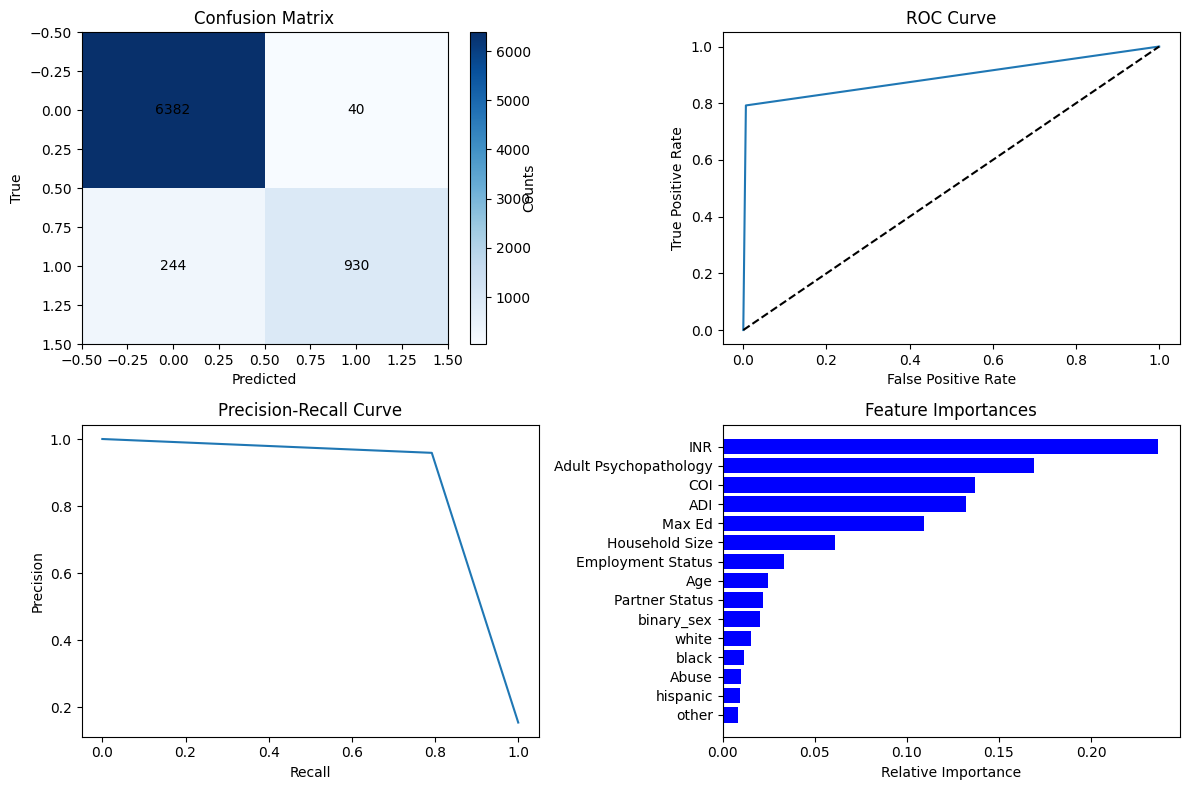

<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)
<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)
<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)
<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,Metric,Score
0,Accuracy,0.857237
1,Precision,0.831517
2,Recall,0.857237
3,F1,0.830924
4,Auc,0.606101


In [ ]:
# Run single model
scores_p, pipe_p = run_single_model(X_1, y_p, strat_k_fold, scoring)

plot_evaluation(pipe_p, X_1, y_p)

generate_metrics_table(scores_p)

### Emotional Neglect

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

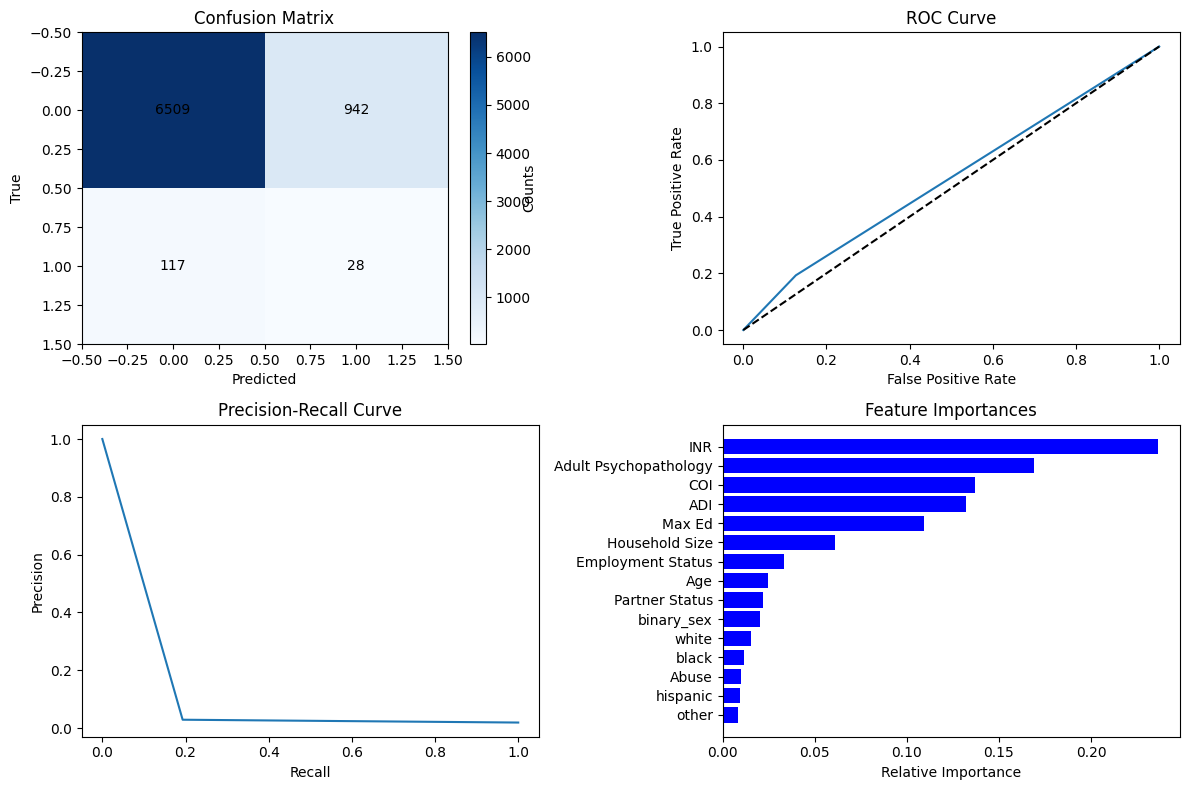

<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)
<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)
<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({'Metric': metric.capitalize(), 'Score': max_score}, ignore_index=True)
<ipython-input-111-c121701c1866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,Metric,Score
0,Accuracy,0.980263
1,Precision,0.962194
2,Recall,0.980263
3,F1,0.971144
4,Auc,0.499665


In [ ]:
# Run single model
scores_e, pipe_e = run_single_model(X_1, y_e, strat_k_fold, scoring)

plot_evaluation(pipe_p, X_1, y_e)

generate_metrics_table(scores_e)

### Supervisory Neglect

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

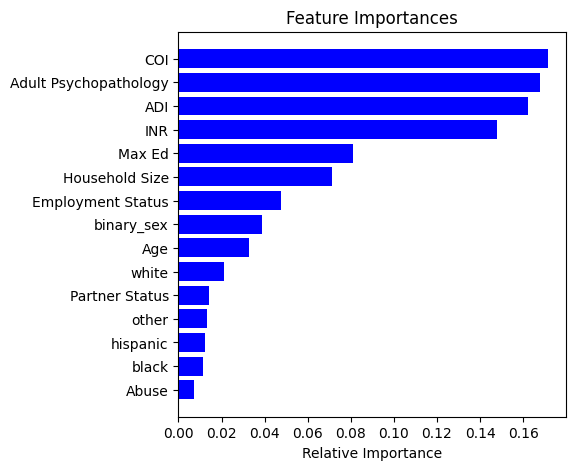

In [ ]:
# Run single model
scores_3, pipe_3 = run_single_model(X_1, y3, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_3.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_1.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

## Aim 2

### Academic issues

Grade drops

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

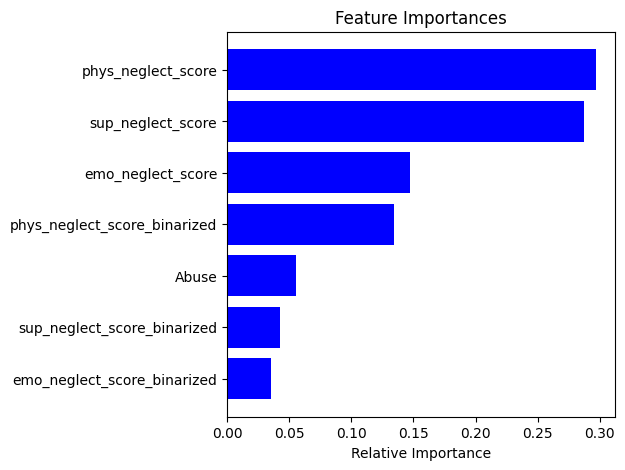

In [ ]:
# Run single model
scores_g, pipe_g = run_single_model(X_2, y_g, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_g.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Suspension

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

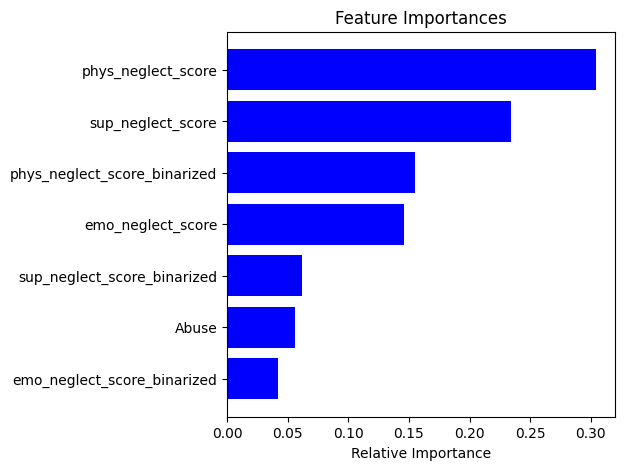

In [ ]:
# Run single model
scores_susp, pipe_susp = run_single_model(X_2, y_susp, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_susp.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

### Psychopathology

Anhedonia

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

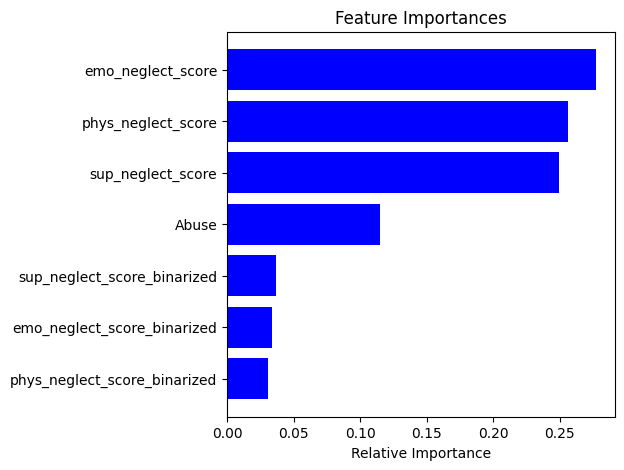

In [ ]:
# Run single model
scores_anh, pipe_anh = run_single_model(X_2, y_anh, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_anh.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Low self esteem

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

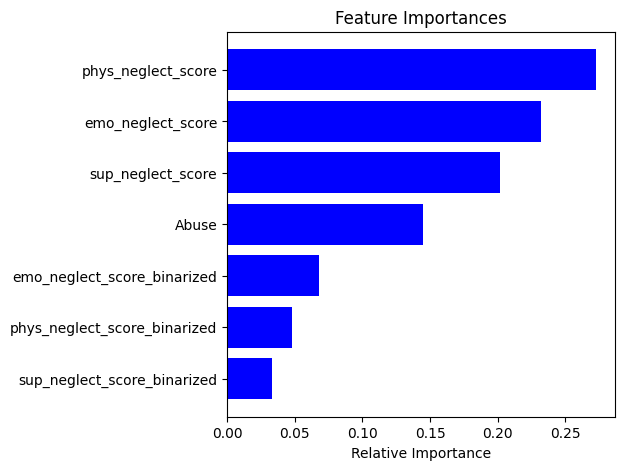

In [ ]:
# Run single model
scores_lse, pipe_lse = run_single_model(X_2, y_lse, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_lse.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Anxiety

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

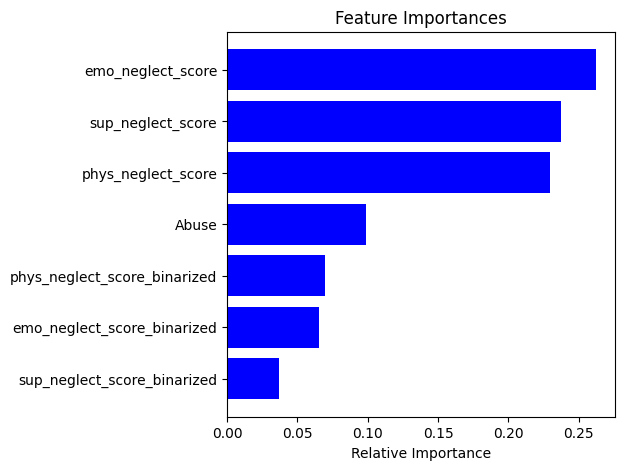

In [ ]:
# Run single model
scores_anx, pipe_anx = run_single_model(X_2, y_anx, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_anx.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Self conscious

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

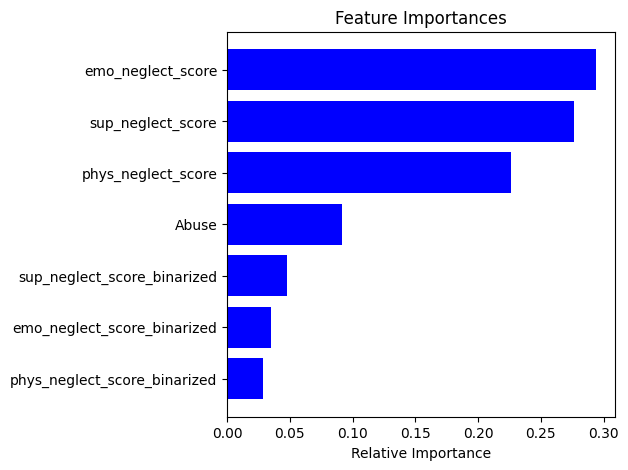

In [ ]:
# Run single model
scores_sc, pipe_sc = run_single_model(X_2, y_sc, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_sc.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Emotional reactivity

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

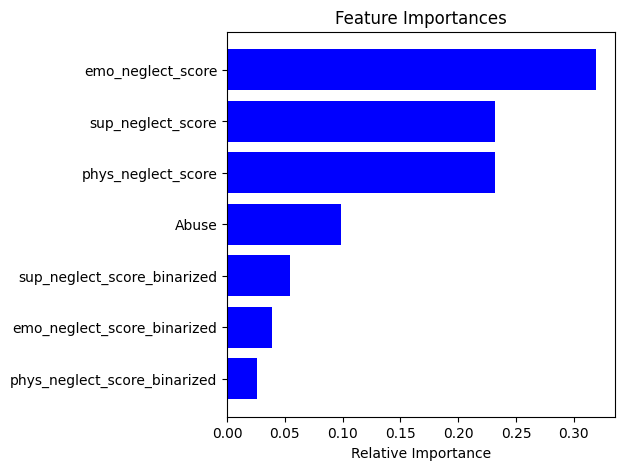

In [ ]:
# Run single model
scores_er, pipe_er = run_single_model(X_2, y_er, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_er.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Oppositionality

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

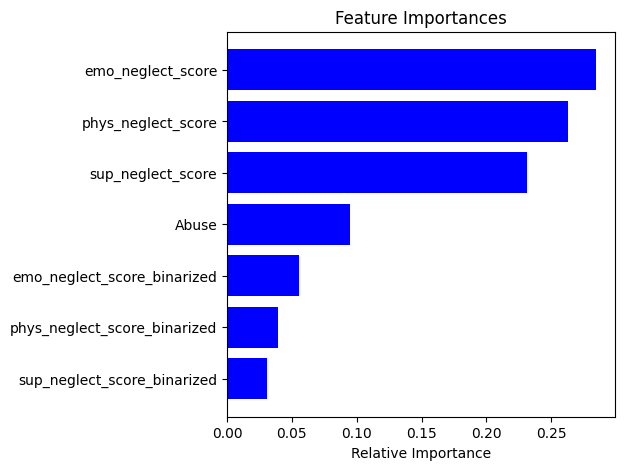

In [ ]:
# Run single model
scores_op, pipe_op = run_single_model(X_2, y_op, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_op.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Antisocial

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

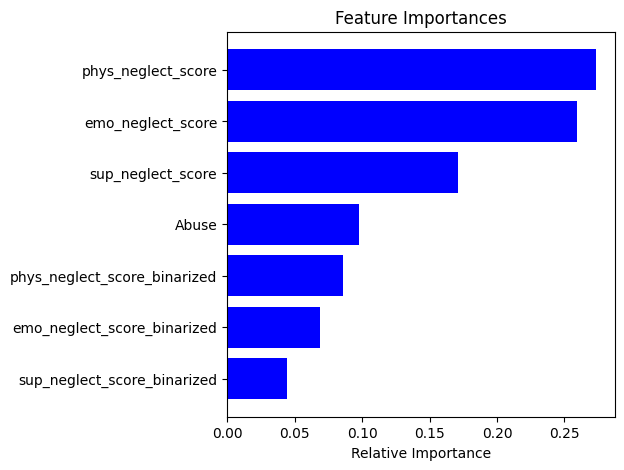

In [ ]:
# Run single model
scores_ant, pipe_ant = run_single_model(X_2, y_ant, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_ant.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

Physical aggression

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

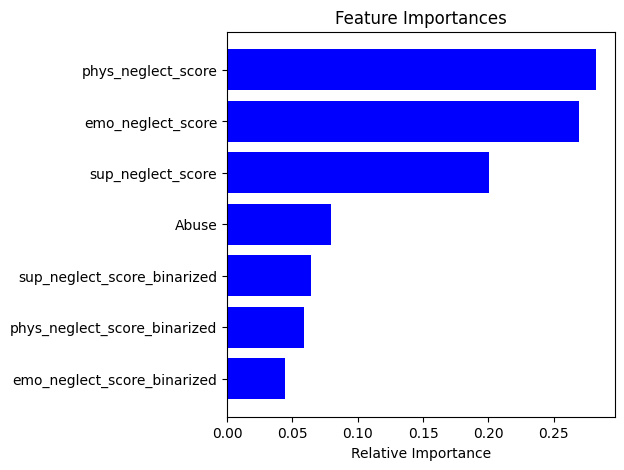

In [ ]:
# Run single model
scores_pa, pipe_pa = run_single_model(X_2, y_pa, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_pa.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

### STBs

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

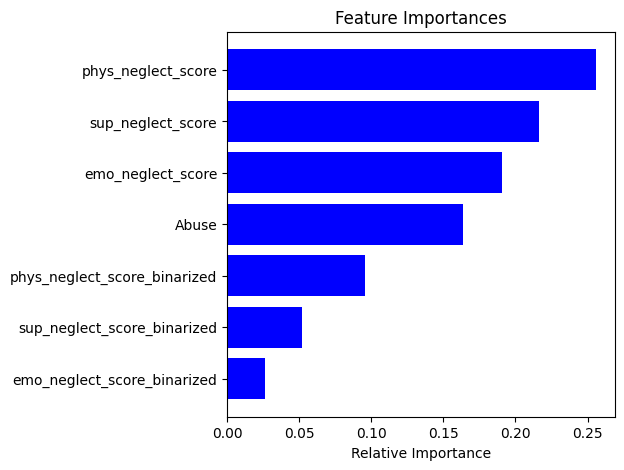

In [ ]:
# Run single model
scores_stb, pipe_stb = run_single_model(X_2, y_stb, strat_k_fold, scoring)

# # Extract single tree
# estimator = pipe.named_steps['classifier'].estimators_[0]

# plt.figure(figsize=(20,10))
# plot_tree(estimator, filled=True, feature_names=X.columns,)  # adjust class names as necessary
# plt.show()


# Feature importance
importances = pipe_stb.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Set the DPI
dpi = 300

# Set the file extension ( 'png', 'svg')

# Export the figure
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('feature_importance.' + 'png', dpi=dpi, bbox_inches='tight')
# plt.savefig('feature_importance.' + 'svg', dpi=dpi, bbox_inches='tight')
plt.show()

In [ ]:
pd.DataFrame.from_dict(scores_pa)

,accuracy,precision,recall,f1,auc,confusion_matrix,roc_curve
0,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
1,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
2,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
3,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
4,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
5,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
6,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
7,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
8,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."
9,0.721065,0.906863,0.721065,0.799194,0.487406,"[[1227, 418], [64, 19]]","([0.0, 0.2541033434650456, 1.0], [0.0, 0.22891..."


# Mediation/moderation logistic

In [ ]:
import statsmodels.api as sm

In [ ]:
X_1.columns

Index(['Household Size', 'Partner Status', 'Max Ed', 'INR',
       'Employment Status', 'ADI', 'COI', 'Age', 'Adult Psychopathology',
       'Abuse', 'binary_sex', 'black', 'hispanic', 'other', 'white'],
      dtype='object')

In [ ]:
X_2.columns

Index(['Abuse', 'INR', 'phys_neglect_score', 'emo_neglect_score',
       'sup_neglect_score', 'phys_neglect_score_binarized',
       'emo_neglect_score_binarized', 'sup_neglect_score_binarized', 'black',
       'hispanic', 'other', 'white', 'binary_sex'],
      dtype='object')

In [ ]:
# Create interaction terms
X_2['INR_phys'] = X_2['INR'] * X_2['phys_neglect_score']
X_2['INR_emo'] = X_2['INR'] * X_2['emo_neglect_score']
X_2['INR_sup'] = X_2['INR'] * X_2['sup_neglect_score']

In [ ]:
['Abuse', 'INR', 'phys_neglect_score', 'emo_neglect_score',
       'sup_neglect_score', 'binary_sex', 'INR_phys', 'INR_emo', 'INR_sup']

In [ ]:
X_2_2 = X_2[['Abuse', 'INR', 'phys_neglect_score', 'emo_neglect_score',
       'sup_neglect_score', 'binary_sex', 'INR_phys']]

In [ ]:
def run_logit_regression(X, y):
    # Add constant column to the features matrix
    X = sm.add_constant(X)

    # Fit the logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Print model summary
    print(result.summary())

def run_probit_regression(X, y):
    # Add constant column to the features matrix
    X = sm.add_constant(X)

    # Fit the probit regression model
    model = sm.Probit(y, X)
    result = model.fit()

    # Print model summary
    print(result.summary())

In [ ]:
run_logit_regression(X_2_2, y_stb)

Optimization terminated successfully.
         Current function value: 0.232000
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                any_stb   No. Observations:                 6683
Model:                          Logit   Df Residuals:                     6675
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                0.008202
Time:                        19:50:06   Log-Likelihood:                -1550.5
converged:                       True   LL-Null:                       -1563.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005828
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1919      0.130    -24.640      0.000      -3.446      -2.938
Abuse

In [ ]:
run_probit_regression(X_2_2, y_stb)

Optimization terminated successfully.
         Current function value: 0.232012
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                any_stb   No. Observations:                 6683
Model:                         Probit   Df Residuals:                     6675
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                0.008149
Time:                        19:50:01   Log-Likelihood:                -1550.5
converged:                       True   LL-Null:                       -1563.3
Covariance Type:            nonrobust   LLR p-value:                 0.0006243
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7617      0.060    -29.176      0.000      -1.880      -1.643
Abuse

In [ ]:
run_logit_regression(X_2_2, y_tb)

Optimization terminated successfully.
         Current function value: 0.081552
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         totprob_binary   No. Observations:                 6683
Model:                          Logit   Df Residuals:                     6673
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                 0.02108
Time:                        19:45:57   Log-Likelihood:                -545.01
converged:                       True   LL-Null:                       -556.75
Covariance Type:            nonrobust   LLR p-value:                  0.005220
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2324      0.245    -17.274      0.000      -4.713      -3.752
Abuse

In [ ]:
run_probit_regression(X_2, y_tb)

Optimization terminated successfully.
         Current function value: 0.080970
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:         totprob_binary   No. Observations:                 6683
Model:                         Probit   Df Residuals:                     6667
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                 0.02807
Time:                        18:31:44   Log-Likelihood:                -541.12
converged:                       True   LL-Null:                       -556.75
Covariance Type:            nonrobust   LLR p-value:                  0.008129
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.7885        nan        nan        nan

In [ ]:
run_logit_regression(X_2, y_ib)

Optimization terminated successfully.
         Current function value: 0.217251
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        internal_binary   No. Observations:                 6683
Model:                          Logit   Df Residuals:                     6667
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                 0.02689
Time:                        18:29:24   Log-Likelihood:                -1451.9
converged:                       True   LL-Null:                       -1492.0
Covariance Type:            nonrobust   LLR p-value:                 6.323e-11
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7448   1.59e+06  -1.72e-06      1.000

In [ ]:
run_probit_regression(X_2, y_ib)

Optimization terminated successfully.
         Current function value: 0.217211
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:        internal_binary   No. Observations:                 6683
Model:                         Probit   Df Residuals:                     6667
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                 0.02707
Time:                        18:31:41   Log-Likelihood:                -1451.6
converged:                       True   LL-Null:                       -1492.0
Covariance Type:            nonrobust   LLR p-value:                 5.037e-11
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.4960        nan        nan        nan

In [ ]:
run_logit_regression(X_2, y_eb)

Optimization terminated successfully.
         Current function value: 0.117613
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        external_binary   No. Observations:                 6683
Model:                          Logit   Df Residuals:                     6667
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                 0.03409
Time:                        18:29:26   Log-Likelihood:                -786.01
converged:                       True   LL-Null:                       -813.75
Covariance Type:            nonrobust   LLR p-value:                 1.484e-06
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.9526   4.64e+06  -6.36e-07      1.000

In [ ]:
run_probit_regression(X_2, y_eb)

Optimization terminated successfully.
         Current function value: 0.117590
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:        external_binary   No. Observations:                 6683
Model:                         Probit   Df Residuals:                     6667
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                 0.03427
Time:                        18:30:47   Log-Likelihood:                -785.86
converged:                       True   LL-Null:                       -813.75
Covariance Type:            nonrobust   LLR p-value:                 1.321e-06
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.5742        nan        nan        nan

# Demographic info

In [ ]:
def calculate_summary_table(data, groupby_cols, outcome_var):
    # Group the data and calculate percentages
    summary_table = data.groupby(groupby_cols)[outcome_var].value_counts(normalize=True).mul(100).unstack()

    # Calculate counts
    count_table = data.groupby(groupby_cols)[outcome_var].value_counts().unstack()

    # Format the percentage table to display percentage signs and round to 2 decimal places
    summary_table = summary_table.applymap('{:.2f}%'.format)

    # Combine the percentage table with the count table
    summary_table = pd.concat([summary_table, count_table], axis=1)

    # Rename the count column
    summary_table.rename(columns={'No': 'Count'}, inplace=True)

    return summary_table

In [ ]:
def calculate_continuous_stats(data, groupby_col, continuous_var):
    # Group the data and calculate mean, standard deviation, and median
    summary_table = data.groupby(groupby_col)[continuous_var].agg(['mean', 'std', 'median'])

    return summary_table

## Neglect outcomes

In [ ]:
aim1_train.columns

Index(['subjectkey', 'Household Size', 'Partner Status', 'Max Ed', 'INR',
       'Employment Status', 'INR Group', 'Highest Education Level',
       'Employment Category', 'Relationship Status', 'ADI', 'COI', 'Race',
       'Race grouping', 'Sex', 'Age', 'Physical neglect score',
       'Emotional neglect score', 'Supervisory neglect score',
       'Physical neglect', 'Emotional neglect', 'Supervisory neglect',
       'Overall Neglect', 'Adult Psychopathology', 'Abuse'],
      dtype='object')

### Physical

In [ ]:
calculate_summary_table(aim1_train, 'INR Group', 'Physical neglect')

Physical neglect,0,1,0,1
INR Group,,,,
deep poverty,57.03%,42.97%,357,269
high income,97.90%,2.10%,3257,70
mid income,86.53%,13.47%,1651,257
near poverty,69.80%,30.20%,832,360
poverty,59.85%,40.15%,325,218


In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex']
outcome_var = 'Physical neglect'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim1_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Physical neglect       0       1     0    1
INR Group                                  
deep poverty      57.03%  42.97%   357  269
high income       97.90%   2.10%  3257   70
mid income        86.53%  13.47%  1651  257
near poverty      69.80%  30.20%   832  360
poverty           59.85%  40.15%   325  218


Summary Table for Highest Education Level:
Physical neglect              0       1     0    1
Highest Education Level                           
Advanced degree          95.93%   4.07%  2638  112
College                  88.85%  11.15%  1800  226
High school              66.78%  33.22%   406  202
Less than high school    54.35%  45.65%    25   21
Some college             72.47%  27.53%  1416  538
Some high school         64.62%  35.38%   137   75


Summary Table for Employment Category:
Physical neglect          0       1     0    1
Employment Category                           
Full-time            88.41%  11.59%  3486  457
Not working          77.53% 

In [ ]:
groupby_cols = ['COI', 'Age']
outcome_var = 'Physical neglect'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim1_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for COI:
                        COI                  
                       mean        std median
Physical neglect                             
0                 64.938804  28.436792   72.0
1                 41.645656  29.248510   39.0


Summary Table for Age:
                       Age                 
                      mean       std median
Physical neglect                           
0                 9.491577  0.507519    9.0
1                 9.462436  0.510381    9.0




### Emotional

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex']
outcome_var = 'Emotional neglect'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim1_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Emotional neglect       0      1     0   1
INR Group                                 
deep poverty       96.81%  3.19%   606  20
high income        98.53%  1.47%  3278  49
mid income         98.11%  1.89%  1872  36
near poverty       97.82%  2.18%  1166  26
poverty            97.42%  2.58%   529  14


Summary Table for Highest Education Level:
Emotional neglect             0      1     0   1
Highest Education Level                         
Advanced degree          98.55%  1.45%  2710  40
College                  98.27%  1.73%  1991  35
High school              97.53%  2.47%   593  15
Less than high school    95.65%  4.35%    44   2
Some college             97.44%  2.56%  1904  50
Some high school         98.58%  1.42%   209   3


Summary Table for Employment Category:
Emotional neglect         0      1     0   1
Employment Category                         
Full-time            98.17%  1.83%  3871  72
Not working          97.87%  2.13%  2160  47
Part-time   

In [ ]:
groupby_cols = ['COI', 'Age']
outcome_var = 'Emotional neglect'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim1_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for COI:
                         COI                  
                        mean        std median
Emotional neglect                             
0                  61.502751  29.754658   70.0
1                  52.910345  29.822372   57.0


Summary Table for Age:
                        Age                 
                       mean       std median
Emotional neglect                           
0                  9.487560  0.508208    9.0
1                  9.462069  0.500287    9.0




### Supervisory Neglect

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex']
outcome_var = 'Supervisory neglect'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim1_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Supervisory neglect       0      1     0   1
INR Group                                   
deep poverty         92.65%  7.35%   580  46
high income          97.42%  2.58%  3241  86
mid income           96.33%  3.67%  1838  70
near poverty         92.87%  7.13%  1107  85
poverty              93.74%  6.26%   509  34


Summary Table for Highest Education Level:
Supervisory neglect           0       1     0    1
Highest Education Level                           
Advanced degree          97.60%   2.40%  2684   66
College                  95.61%   4.39%  1937   89
High school              93.59%   6.41%   569   39
Less than high school    82.61%  17.39%    38    8
Some college             94.47%   5.53%  1846  108
Some high school         94.81%   5.19%   201   11


Summary Table for Employment Category:
Supervisory neglect       0      1     0    1
Employment Category                          
Full-time            96.02%  3.98%  3786  157
Not working          95.

In [ ]:
groupby_cols = ['COI', 'Age']
outcome_var = 'Supervisory neglect'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim1_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for COI:
                           COI                  
                          mean        std median
Supervisory neglect                             
0                    61.779794  29.683648   70.0
1                    51.342679  30.187037   51.0


Summary Table for Age:
                          Age                 
                         mean       std median
Supervisory neglect                           
0                    9.491658  0.507681    9.0
1                    9.383178  0.505807    9.0




## Psychopathology outcomes

In [ ]:
aim2_train.columns

Index(['subjectkey', 'INR Group', 'Highest Education Level',
       'Employment Category', 'Relationship Status', 'Race grouping', 'Sex',
       'Age', 'Adult Psychopathology', 'Abuse', 'phys_neglect_score',
       'emo_neglect_score', 'sup_neglect_score',
       'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized', 'Overall Neglect',
       'kbi_y_drop_in_grades', 'kbi_y_det_susp', 'Anhedonia score_binary',
       'Low Self Esteem score_binary', 'Anxious score_binary',
       'Self Conscious score_binary', 'Emotional reactivity score_binary',
       'Oppositionality score_binary', 'Antisocial score_binary',
       'Physical aggression score_binary', 'any_stb'],
      dtype='object')

### STBs

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'any_stb'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
any_stb            0       1     0    1
INR Group                              
deep poverty  90.85%   9.15%   695   70
high income   90.63%   9.37%  3395  351
mid income    88.83%  11.17%  1924  242
near poverty  89.97%  10.03%  1175  131
poverty       90.35%   9.65%   590   63


Summary Table for Highest Education Level:
any_stb                       0       1     0    1
Highest Education Level                           
Advanced degree          90.39%   9.61%  2766  294
College                  89.76%  10.24%  2033  232
High school              92.39%   7.61%   680   56
Less than high school    87.30%  12.70%    55    8
Some college             88.95%  11.05%  1973  245
Some high school         92.52%   7.48%   272   22


Summary Table for Employment Category:
any_stb                   0       1     0    1
Employment Category                           
Full-time            90.41%   9.59%  4017  426
Not working          88.44%  11.56%  2264  296
Part-time

In [ ]:
groupby_cols = ['Age']
outcome_var = 'any_stb'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for Age:
              Age                 
             mean       std median
any_stb                           
0        9.470197  0.506340    9.0
1        9.485006  0.514486    9.0




### Internalizing

In [ ]:
'Anhedonia score_binary',
       'Low Self Esteem score_binary', 'Anxious score_binary',
       'Self Conscious score_binary', 'Emotional reactivity score_binary',
       'Oppositionality score_binary', 'Antisocial score_binary',
       'Physical aggression score_binary'

Anhedonia

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Anhedonia score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Anhedonia score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Anhedonia score_binary       0       1     0    1
INR Group                                        
deep poverty            86.01%  13.99%   658  107
high income             88.23%  11.77%  3305  441
mid income              88.69%  11.31%  1921  245
near poverty            88.28%  11.72%  1153  153
poverty                 87.29%  12.71%   570   83


Summary Table for Highest Education Level:
Anhedonia score_binary        0       1     0    1
Highest Education Level                           
Advanced degree          87.91%  12.09%  2690  370
College                  88.30%  11.70%  2000  265
High school              88.72%  11.28%   653   83
Less than high school    85.71%  14.29%    54    9
Some college             88.23%  11.77%  1957  261
Some high school         86.05%  13.95%   253   41


Summary Table for Employment Category:
Anhedonia score_binary       0       1     0    1
Employment Category                              
Full-time               88.

Low self esteem

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Low Self Esteem score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Low Self Esteem score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Low Self Esteem score_binary       0       1     0    1
INR Group                                              
deep poverty                  90.07%   9.93%   689   76
high income                   89.11%  10.89%  3338  408
mid income                    89.94%  10.06%  1948  218
near poverty                  89.97%  10.03%  1175  131
poverty                       89.59%  10.41%   585   68


Summary Table for Highest Education Level:
Low Self Esteem score_binary       0       1     0    1
Highest Education Level                                
Advanced degree               88.82%  11.18%  2718  342
College                       89.49%  10.51%  2027  238
High school                   88.86%  11.14%   654   82
Less than high school         90.48%   9.52%    57    6
Some college                  90.85%   9.15%  2015  203
Some high school              89.80%  10.20%   264   30


Summary Table for Employment Category:
Low Self Esteem score_binary       0       1 

Anxiety

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Anxious score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Anxious score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Anxious score_binary       0       1     0    1
INR Group                                      
deep poverty          76.73%  23.27%   587  178
high income           77.52%  22.48%  2904  842
mid income            76.59%  23.41%  1659  507
near poverty          77.26%  22.74%  1009  297
poverty               79.17%  20.83%   517  136


Summary Table for Highest Education Level:
Anxious score_binary          0       1     0    1
Highest Education Level                           
Advanced degree          76.60%  23.40%  2344  716
College                  77.22%  22.78%  1749  516
High school              79.89%  20.11%   588  148
Less than high school    63.49%  36.51%    40   23
Some college             78.04%  21.96%  1731  487
Some high school         76.19%  23.81%   224   70


Summary Table for Employment Category:
Anxious score_binary       0       1     0     1
Employment Category                             
Full-time             76.93%  23.07%  3418 

Self conscious

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Self Conscious score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Self Conscious score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Self Conscious score_binary       0       1     0     1
INR Group                                              
deep poverty                 47.84%  52.16%   366   399
high income                  48.37%  51.63%  1812  1934
mid income                   47.32%  52.68%  1025  1141
near poverty                 45.71%  54.29%   597   709
poverty                      47.17%  52.83%   308   345


Summary Table for Highest Education Level:
Self Conscious score_binary       0       1     0     1
Highest Education Level                                
Advanced degree              48.04%  51.96%  1470  1590
College                      47.15%  52.85%  1068  1197
High school                  50.82%  49.18%   374   362
Less than high school        46.03%  53.97%    29    34
Some college                 46.93%  53.07%  1041  1177
Some high school             42.86%  57.14%   126   168


Summary Table for Employment Category:
Self Conscious score_binary       0       1  

### Externalizing

Emotional Reactivity

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Emotional reactivity score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Emotional reactivity score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Emotional reactivity score_binary       0       1     0    1
INR Group                                                   
deep poverty                       76.99%  23.01%   589  176
high income                        77.84%  22.16%  2916  830
mid income                         78.07%  21.93%  1691  475
near poverty                       78.18%  21.82%  1021  285
poverty                            77.64%  22.36%   507  146


Summary Table for Highest Education Level:
Emotional reactivity score_binary       0       1     0    1
Highest Education Level                                     
Advanced degree                    77.45%  22.55%  2370  690
College                            77.75%  22.25%  1761  504
High school                        77.58%  22.42%   571  165
Less than high school              79.37%  20.63%    50   13
Some college                       78.85%  21.15%  1749  469
Some high school                   75.85%  24.15%   223   71


Summary T

Oppositionality

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Oppositionality score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Oppositionality score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Oppositionality score_binary       0       1     0    1
INR Group                                              
deep poverty                  79.35%  20.65%   607  158
high income                   77.92%  22.08%  2919  827
mid income                    79.64%  20.36%  1725  441
near poverty                  80.93%  19.07%  1057  249
poverty                       77.64%  22.36%   507  146


Summary Table for Highest Education Level:
Oppositionality score_binary       0       1     0    1
Highest Education Level                                
Advanced degree               77.78%  22.22%  2380  680
College                       78.28%  21.72%  1773  492
High school                   80.43%  19.57%   592  144
Less than high school         79.37%  20.63%    50   13
Some college                  80.79%  19.21%  1792  426
Some high school              77.55%  22.45%   228   66


Summary Table for Employment Category:
Oppositionality score_binary       0       1 

Antisocial

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Antisocial score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Antisocial score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Antisocial score_binary       0      1     0    1
INR Group                                        
deep poverty             96.73%  3.27%   740   25
high income              97.12%  2.88%  3638  108
mid income               97.23%  2.77%  2106   60
near poverty             97.40%  2.60%  1272   34
poverty                  98.01%  1.99%   640   13


Summary Table for Highest Education Level:
Antisocial score_binary        0      1       0     1
Highest Education Level                              
Advanced degree           96.80%  3.20%  2962.0  98.0
College                   97.57%  2.43%  2210.0  55.0
High school               97.96%  2.04%   721.0  15.0
Less than high school    100.00%   nan%    63.0   NaN
Some college              97.16%  2.84%  2155.0  63.0
Some high school          96.94%  3.06%   285.0   9.0


Summary Table for Employment Category:
Antisocial score_binary       0      1     0    1
Employment Category                              
Ful

Physical aggression

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'Physical aggression score_binary'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

groupby_cols = ['Age']
outcome_var = 'Physical aggression score_binary'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
Physical aggression score_binary       0      1     0    1
INR Group                                                 
deep poverty                      95.03%  4.97%   727   38
high income                       95.14%  4.86%  3564  182
mid income                        95.71%  4.29%  2073   93
near poverty                      95.33%  4.67%  1245   61
poverty                           94.03%  5.97%   614   39


Summary Table for Highest Education Level:
Physical aggression score_binary       0      1     0    1
Highest Education Level                                   
Advanced degree                   95.03%  4.97%  2908  152
College                           95.67%  4.33%  2167   98
High school                       94.70%  5.30%   697   39
Less than high school             92.06%  7.94%    58    5
Some college                      95.40%  4.60%  2116  102
Some high school                  94.22%  5.78%   277   17


Summary Table for Employment Category:


## Academic outcomes

### Grade Drops

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'kbi_y_drop_in_grades'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
kbi_y_drop_in_grades     0.0     1.0   0.0  1.0
INR Group                                      
deep poverty          75.16%  24.84%   575  190
high income           90.79%   9.21%  3401  345
mid income            84.81%  15.19%  1837  329
near poverty          82.08%  17.92%  1072  234
poverty               75.19%  24.81%   491  162


Summary Table for Highest Education Level:
kbi_y_drop_in_grades        0.0     1.0   0.0  1.0
Highest Education Level                           
Advanced degree          91.11%   8.89%  2788  272
College                  86.80%  13.20%  1966  299
High school              77.04%  22.96%   567  169
Less than high school    71.43%  28.57%    45   18
Some college             80.88%  19.12%  1794  424
Some high school         73.47%  26.53%   216   78


Summary Table for Employment Category:
kbi_y_drop_in_grades     0.0     1.0   0.0  1.0
Employment Category                            
Full-time             86.14%  13.86%  3827  6

In [ ]:
groupby_cols = ['Age']
outcome_var = 'kbi_y_drop_in_grades'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for Age:
                           Age                 
                          mean       std median
kbi_y_drop_in_grades                           
0.0                   9.470336  0.507358    9.0
1.0                   9.479452  0.506016    9.0




### Suspensions

In [ ]:
groupby_cols = ['INR Group', 'Highest Education Level', 'Employment Category', 'Race grouping', 'Sex', 'phys_neglect_score_binarized', 'emo_neglect_score_binarized',
       'sup_neglect_score_binarized']
outcome_var = 'kbi_y_det_susp'

for col in groupby_cols:
    summary_table = calculate_summary_table(aim2_train, [col], outcome_var)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for INR Group:
kbi_y_det_susp     0.0     1.0   0.0  1.0
INR Group                                
deep poverty    78.17%  21.83%   598  167
high income     96.56%   3.44%  3617  129
mid income      92.29%   7.71%  1999  167
near poverty    88.59%  11.41%  1157  149
poverty         79.48%  20.52%   519  134


Summary Table for Highest Education Level:
kbi_y_det_susp              0.0     1.0   0.0  1.0
Highest Education Level                           
Advanced degree          96.34%   3.66%  2948  112
College                  93.91%   6.09%  2127  138
High school              81.79%  18.21%   602  134
Less than high school    85.71%  14.29%    54    9
Some college             86.34%  13.66%  1915  303
Some high school         82.99%  17.01%   244   50


Summary Table for Employment Category:
kbi_y_det_susp          0.0     1.0   0.0  1.0
Employment Category                           
Full-time            92.05%   7.95%  4090  353
Not working          89.06%  10.94%  2280 

In [ ]:
groupby_cols = ['Age']
outcome_var = 'kbi_y_det_susp'

for col in groupby_cols:
    summary_table = calculate_continuous_stats(aim2_train, outcome_var, [col])
    print(f"Summary Table for {col}:")
    print(summary_table)
    print("\n")

Summary Table for Age:
                     Age                 
                    mean       std median
kbi_y_det_susp                           
0.0             9.466072  0.506295    9.0
1.0             9.530831  0.512647   10.0


